In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/petrol_consumption.csv')
df

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.00            3571            1976                         0.525   
1         9.00            4092            1250                         0.572   
2         9.00            3865            1586                         0.580   
3         7.50            4870            2351                         0.529   
4         8.00            4399             431                         0.544   
5        10.00            5342            1333                         0.571   
6         8.00            5319           11868                         0.451   
7         8.00            5126            2138                         0.553   
8         8.00            4447            8577                         0.529   
9         7.00            4512            8507                         0.552   
10        8.00            4391            5939                         0.530   
11        7.50            5126           14186                         0.525   
12        7.00            4817            6930                         0.574   
13        7.00            4207            6580                         0.545   
14        7.00            4332            8159                         0.608   
15        7.00            4318           10340                         0.586   
16        7.00            4206            8508                         0.572   
17        7.00            3718            4725                         0.540   
18        7.00            4716            5915                         0.724   
19        8.50            4341            6010                         0.677   
20        7.00            4593            7834                         0.663   
21        8.00            4983             602                         0.602   
22        9.00            4897            2449                         0.511   
23        9.00            4258            4686                         0.517   
24        8.50            4574            2619                         0.551   
25        9.00            3721            4746                         0.544   
26        8.00            3448            5399                         0.548   
27        7.50            3846            9061                         0.579   
28        8.00            4188            5975                         0.563   
29        9.00            3601            4650                         0.493   
30        7.00            3640            6905                         0.518   
31        7.00            3333            6594                         0.513   
32        8.00            3063            6524                         0.578   
33        7.50            3357            4121                         0.547   
34        8.00            3528            3495                         0.487   
35        6.58            3802            7834                         0.629   
36        5.00            4045           17782                         0.566   
37        7.00            3897            6385                         0.586   
38        8.50            3635            3274                         0.663   
39        7.00            4345            3905                         0.672   
40        7.00            4449            4639                         0.626   
41        7.00            3656            3985                         0.563   
42        7.00            4300            3635                         0.603   
43        7.00            3745            2611                         0.508   
44        6.00            5215            2302                         0.672   
45        9.00            4476            3942                         0.571   
46        7.00            4296            4083                         0.623   
47        7.00            5002            9794                         0.593   

    Petrol_Consumption  
0                  541  
1                  524  
2       

In [3]:
#x=df[['Variance','Skewness','Curtosis','Entropy']]  # Input Features
x=df.drop('Petrol_Consumption',axis=1)   
y= df['Petrol_Consumption']   # Output Label

In [4]:
x.shape

(48, 4)

In [7]:
y.shape

(48,)

In [9]:
x.corrwith(y)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

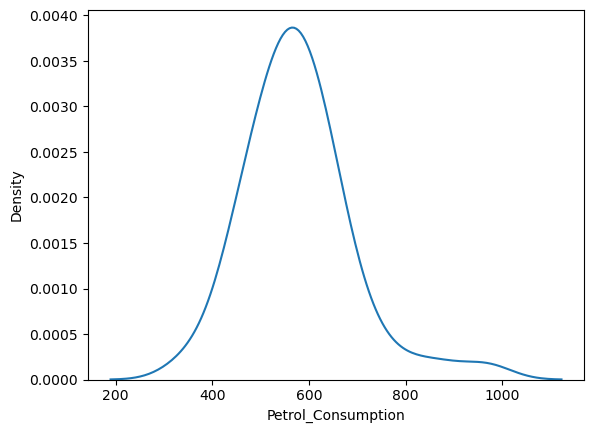

In [10]:
sns.kdeplot(y)

In [12]:
x.describe()

Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  
count                     48.000000  
mean                       0.570333  
std                        0.055470  
min                        0.451000  
25%                        0.529750  
50%                        0.564500  
75%                        0.595250  
max                        0.724000

In [14]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [17]:
x_train.shape, x_test.shape

((36, 4), (12, 4))

In [18]:
# Build the model
from sklearn.tree import DecisionTreeRegressor

In [19]:
regressor=DecisionTreeRegressor(random_state=0)

In [20]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
# Performance Evaluation
y_pred=regressor.predict(x_test)
y_pred

array([541., 498., 628., 628., 628., 644., 628., 649., 414., 464., 414.,
       628.])

In [25]:
result=pd.DataFrame({
    'Actual': y_test,
    'Predicted':y_pred
})
result

Actual  Predicted
29     534      541.0
4      410      498.0
26     577      628.0
30     571      628.0
32     577      628.0
37     704      644.0
34     487      628.0
40     587      649.0
7      467      414.0
10     580      464.0
11     471      414.0
31     554      628.0

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [29]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [30]:
mean_absolute_percentage_error(y_test, y_pred)

0.1294003614849453

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

75.58604368532593

In [33]:
#Visualize
from sklearn.tree import plot_tree

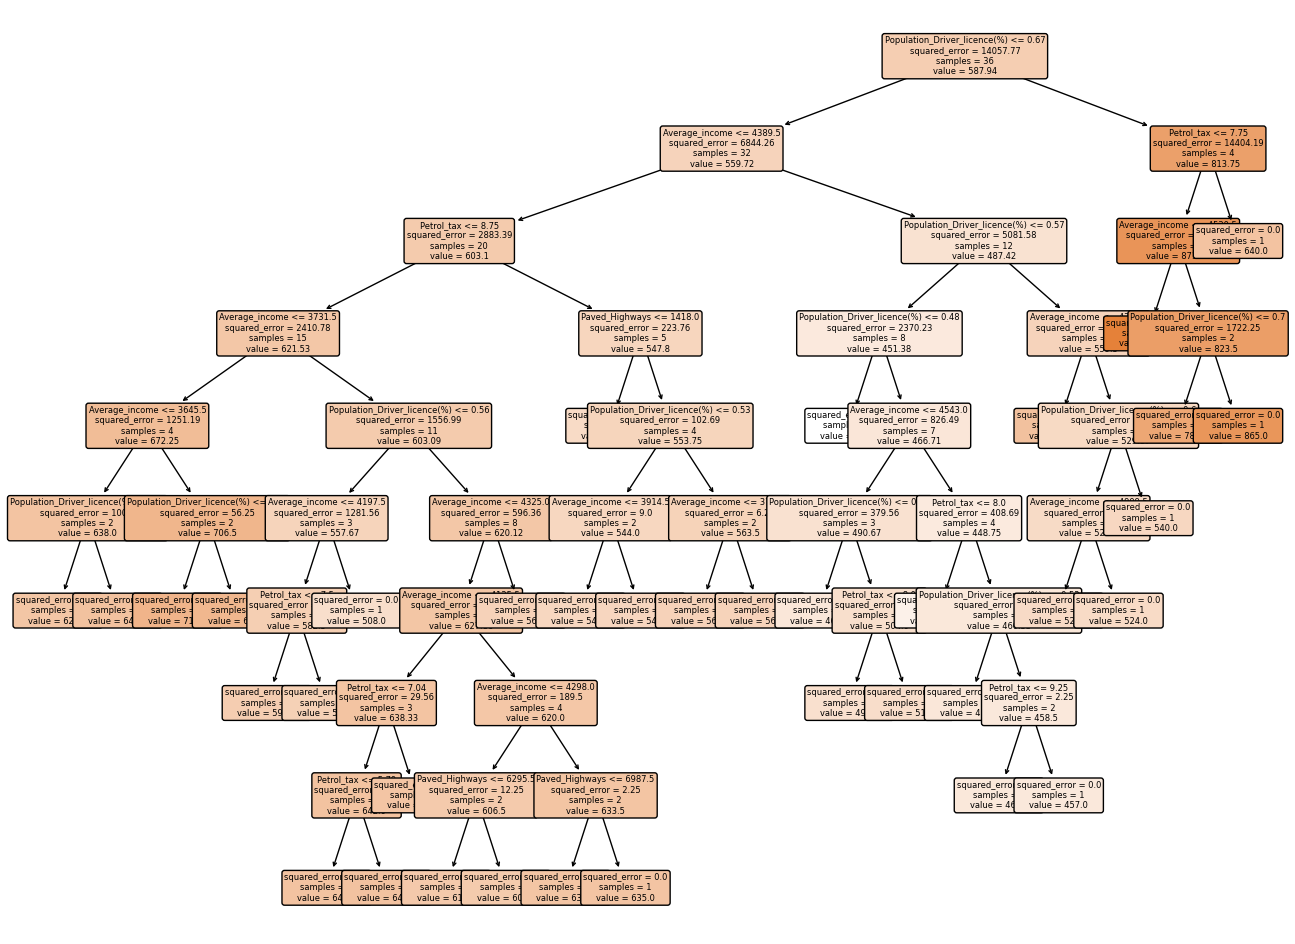

In [34]:
plt.figure(figsize=(16,12))
plot_tree(regressor, fontsize=6, feature_names=x.columns,filled=True, precision=2, rounded=True);

<BarContainer object of 4 artists>

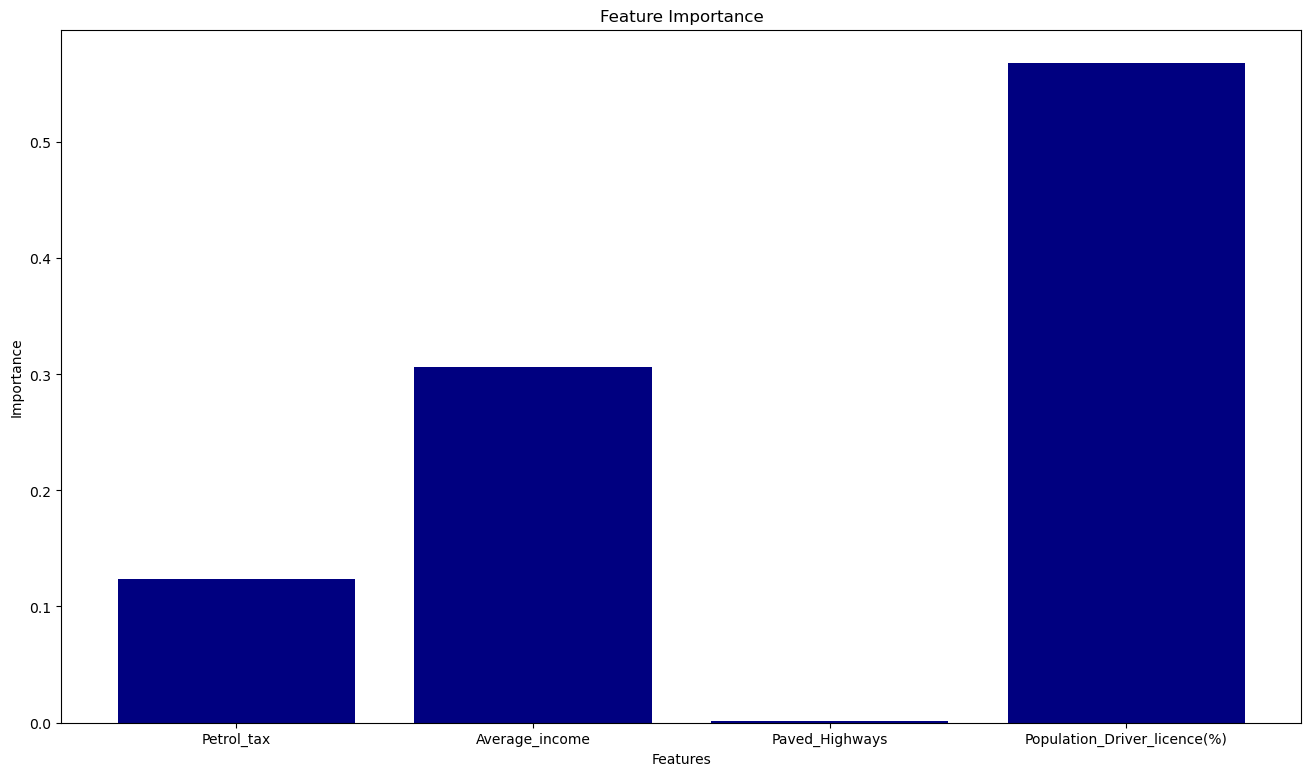

In [36]:
# Feature Importance
plt.figure(figsize=(16,9))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, regressor.feature_importances_, color='navy')

In [37]:
print(regressor.feature_importances_)

[0.12361507 0.30645154 0.00145639 0.568477  ]


In [38]:
# Prediction on Unseen data
new=pd.DataFrame(data=[[7.3,4449,4639,0.626],
                       [6.4,5215,2302,0.672]],
                 columns=x.columns)
new

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
0         7.3            4449            4639                         0.626
1         6.4            5215            2302                         0.672

In [39]:
y_p=regressor.predict(new)
y_p

array([649., 782.])

In [42]:
np.sqrt(2)

1.4142135623730951